# Airbnb Berlin Price Prediction

This is a Kaggle competition and can be found [here](https://www.kaggle.com/datasets/gauravduttakiit/airbnb-berlin-price-prediction)

# Libraries

In [39]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Functions

In [2]:
def print_NA_info(df: pd.DataFrame, feature:str):
    print(f"Number of unique values: {len(df[feature].unique())}")
    print(f"Unique values: {df[feature].unique()}")
    print(f"Shape train data: {df.shape}")
    na_per = ((df[feature].isna().sum() / len(df[feature])) * 100).round(2)
    print(f"The percentage of NA is: {na_per}%", end="\n\n")
    ##
    print(
        df
        .groupby(feature)[feature]
        .count()
    )

# Load data

In [3]:
# Load the dataset
def load_ds(path: Path, filename: str) -> pd.DataFrame:
    """Read the dataset csv file as a pandas dataframe."""
    
    return pd.read_csv(path / filename)


dataset_path = Path().absolute() / "data"

# Load dataset
filename = "train_airbnb_berlin.csv"
train = load_ds(dataset_path, filename)

In [4]:
print(f"Shape train data set: {train.shape}")

Shape train data set: (15692, 39)


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15692 entries, 0 to 15691
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Listing ID             15691 non-null  float64
 1   Listing Name           15638 non-null  object 
 2   Host ID                15692 non-null  float64
 3   Host Name              15670 non-null  object 
 4   Host Since             15671 non-null  object 
 5   Host Response Time     8617 non-null   object 
 6   Host Response Rate     8617 non-null   object 
 7   Is Superhost           15669 non-null  object 
 8   neighbourhood          15692 non-null  object 
 9   Neighborhood Group     15692 non-null  object 
 10  City                   15691 non-null  object 
 11  Postal Code            15463 non-null  object 
 12  Country Code           15692 non-null  object 
 13  Country                15692 non-null  object 
 14  Latitude               15692 non-null  float64
 15  Lo

In [6]:
train.describe()

,Listing ID,Host ID,Latitude,Longitude,Square Feet,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Price
count,1.569100e+04,1.569200e+04,15692.000000,15692.000000,303.000000,15692.000000,12730.000000,12721.000000,12722.000000,12719.000000,12722.000000,12721.000000,12720.000000,15683.000000
mean,1.780062e+07,6.119042e+07,52.509893,13.407334,445.900990,19.452014,94.717282,9.717475,9.328407,9.769164,9.779201,9.556874,9.458097,60.342983
std,9.952544e+06,6.739421e+07,0.031286,0.058646,414.817342,39.483853,7.069787,0.671793,1.023807,0.620347,0.619545,0.731109,0.788891,48.829687
min,2.241500e+04,1.101500e+04,52.369270,13.121400,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000
25%,9.052831e+06,9.274528e+06,52.488920,13.376025,0.000000,1.000000,93.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,32.000000
50%,1.865037e+07,3.358182e+07,52.509100,13.417250,440.000000,5.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,49.000000
75%,2.611308e+07,9.325677e+07,52.532713,13.439750,700.000000,17.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,70.000000
max,3.467450e+07,2.609698e+08,52.639670,13.709020,1912.000000,424.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,900.000000


In [7]:
(train.isna().sum() / train.shape[0] * 100).round(2).reset_index()

,index,0
0,Listing ID,0.01
1,Listing Name,0.34
2,Host ID,0.00
3,Host Name,0.14
4,Host Since,0.13
5,Host Response Time,45.09
6,Host Response Rate,45.09
7,Is Superhost,0.15
8,neighbourhood,0.00
9,Neighborhood Group,0.00


Check where `Price` is NA

In [8]:
train.loc[train.Price.isna(), :]

,Listing ID,Listing Name,Host ID,Host Name,Host Since,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Neighborhood Group,...,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready,Price
1929,17616585.0,*,107891457.0,TWO Hotel Berlin By Axel - Adults,2018-05-03,within an hour,100%,f,Wilmersdorf,Charlottenburg-Wilm.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,NaN
2556,26350196.0,*,199004544.0,TWa Hotel Berlin By Axel - Adults,2018-06-03,within an hour,100%,f,Wilmersdorf,Charlottenburg-Wilm.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,NaN
3746,26205207.0,*,175078775.0,TW Hotel Berlin By Axel - Adults,2018-05-03,within an hour,100%,f,Wilmersdorf,Charlottenburg-Wilm.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,NaN
5531,29226856.0,*,165805342.0,TWO Hotel Berlin By Axel - Adults,2017-11-03,within an hour,100%,f,Wilmersdorf,Charlottenburg-Wilm.,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,f,NaN
9302,32520779.0,*,240214818.0,St Christophers Inn Berlin,2019-02-28,a few days or more,0%,t,Mitte,Mitte,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,NaN
9898,16161589.0,*,99517180.0,Axel Hotel Berlin - Adults Only,2016-10-05,within an hour,100%,f,SchÃ¶neberg,Tempelhof - SchÃ¶neberg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,NaN
10849,17224277.0,*,62178710.0,TW Hotel Berlin By Aeel - Adults,2016-03-03,within an hour,100%,f,Wilmersdorf,Charlottenburg-Wilm.,...,75.0,10.0,8.0,10.0,9.0,8.0,10.0,t,f,NaN
11968,26697198.0,*,80918009.0,Axel Hotel Berlin - Adults Only,2016-08-05,within an hour,100%,f,SchÃ¶neberg,Tempelhof - SchÃ¶neberg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,NaN
14570,17937758.0,*,115965392.0,TWO Hotel Berlin By Axel - Adults,2017-01-03,within an hour,100%,f,Wilmersdorf,Charlottenburg-Wilm.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,NaN


Remove the rows where `Price` is NA or 0

In [9]:
train = train.loc[~train.Price.isna(), :]

In [10]:
(train.isna().sum() / train.shape[0] * 100).round(2).reset_index()

,index,0
0,Listing ID,0.01
1,Listing Name,0.34
2,Host ID,0.00
3,Host Name,0.14
4,Host Since,0.13
5,Host Response Time,45.11
6,Host Response Rate,45.11
7,Is Superhost,0.15
8,neighbourhood,0.00
9,Neighborhood Group,0.00


# Price

We focus on making pradictions for flats/rooms between `20€` and `150€`, so the data outside this range will be dropped.

In [11]:
# define range
price_min = 20
price_max = 150

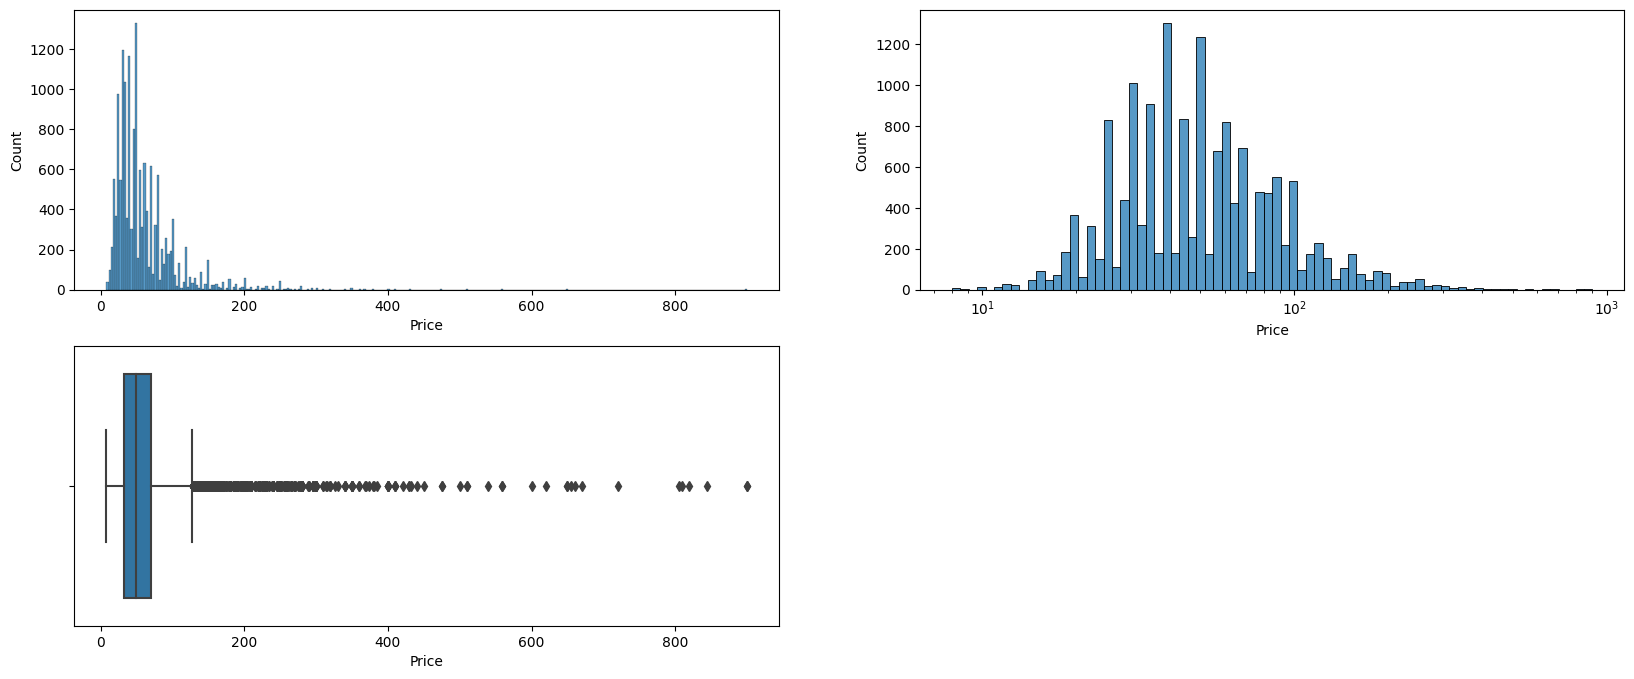

In [12]:
plt.figure(figsize=(20, 8))

plt.subplot(2, 2, 1)
sns.histplot(train, x="Price")

plt.subplot(2, 2, 2)
sns.histplot(train, x="Price", log_scale=True)

plt.subplot(2, 2, 3)
sns.boxplot(x="Price", data=train)

plt.show()

In [13]:
print(f"Price length: {len(train.Price)}")
print(f"NUmber of Price valeus larger than {price_max}: {sum(train.Price > price_max)}")
print(f"NUmber of Price valeus smaller than {price_min}: {sum(train.Price < price_min)}")

Price length: 15683
NUmber of Price valeus larger than 150: 599
NUmber of Price valeus smaller than 20: 534


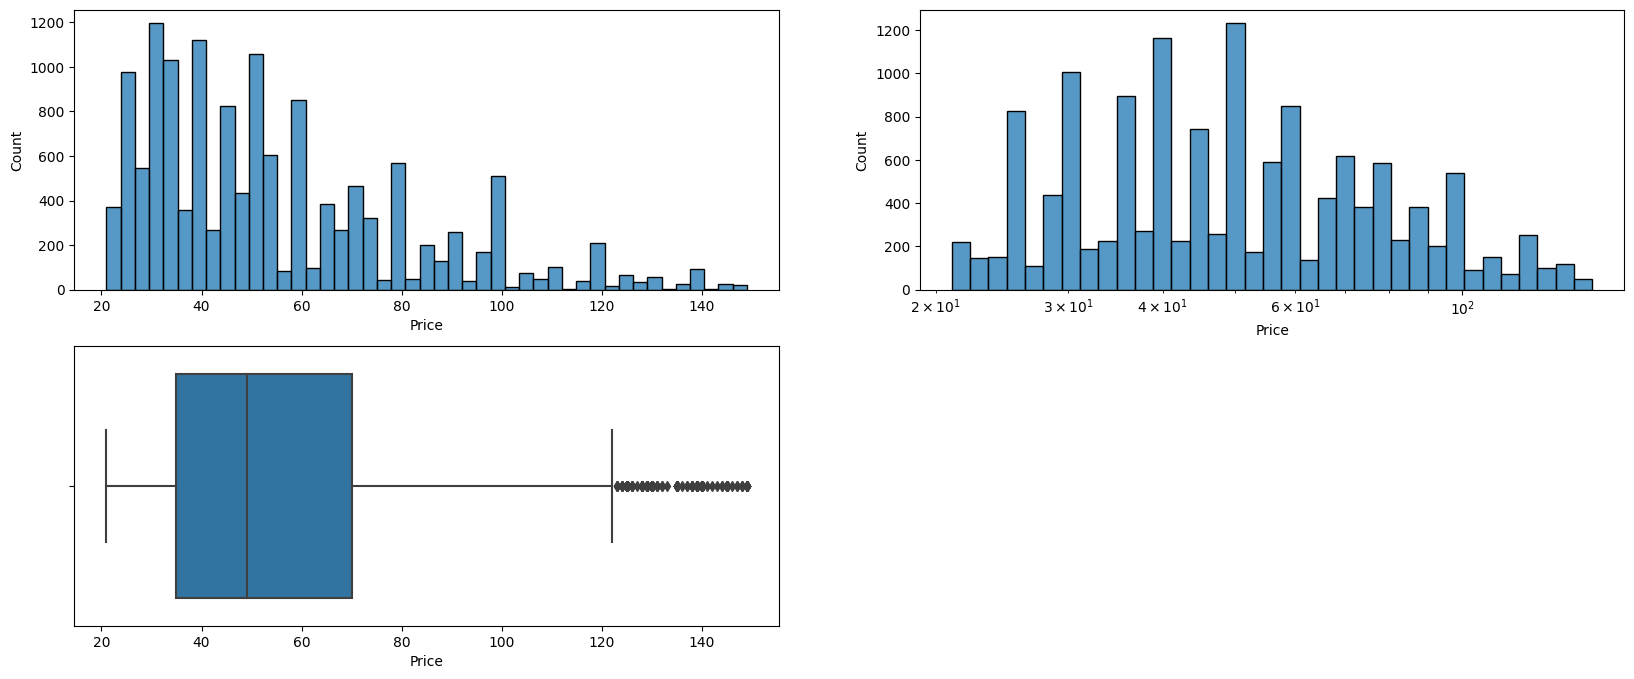

In [14]:
X_y_train_TMP = train.copy()
X_y_train_TMP = X_y_train_TMP.loc[X_y_train_TMP.Price < price_max, :]
X_y_train_TMP = X_y_train_TMP.loc[X_y_train_TMP.Price > price_min, :]

plt.figure(figsize=(20, 8))

plt.subplot(2, 2, 1)
sns.histplot(X_y_train_TMP, x="Price")

plt.subplot(2, 2, 2)
sns.histplot(X_y_train_TMP, x="Price", log_scale=True)

plt.subplot(2, 2, 3)
sns.boxplot(x="Price", data=X_y_train_TMP)

plt.show()

In [15]:
train = train.loc[train.Price < price_max, :]
train = train.loc[train.Price > price_min, :]

## Split train/test set

In [16]:
# Split train and test data

X_y_train, X_y_test = train_test_split(train, test_size=0.2, random_state=123, shuffle=True)

X_y_train = X_y_train.reset_index(drop=True)
X_y_test = X_y_test.reset_index(drop=True)

print(f"shape data: {train.shape}")

print(f"\n{train.shape[0]} * 0.8 = {train.shape[0] * 0.8:.2f}")
print(f"shape X_y_train: {X_y_train.shape}")

print(f"\n{train.shape[0]} * 0.2 = {train.shape[0] * 0.2:.2f}")
print(f"shape X_y_test:  {X_y_test.shape}")

shape data: (14054, 39)

14054 * 0.8 = 11243.20
shape X_y_train: (11243, 39)

14054 * 0.2 = 2810.80
shape X_y_test:  (2811, 39)


# Save train and test datasets

In [17]:
# Save train and test sets
X_y_train.to_csv(Path().absolute() / "data" / "X_y_train.csv", index=False)
X_y_test.to_csv(Path().absolute() / "data" / "X_y_test.csv", index=False)

X_y_train.columns

Index(['Listing ID', 'Listing Name', 'Host ID', 'Host Name', 'Host Since',
       'Host Response Time', 'Host Response Rate', 'Is Superhost',
       'neighbourhood', 'Neighborhood Group', 'City', 'Postal Code',
       'Country Code', 'Country', 'Latitude', 'Longitude', 'Is Exact Location',
       'Property Type', 'Room Type', 'Accomodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Square Feet', 'Guests Included', 'Min Nights', 'Reviews',
       'First Review', 'Last Review', 'Overall Rating', 'Accuracy Rating',
       'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
       'Location Rating', 'Value Rating', 'Instant Bookable',
       'Business Travel Ready', 'Price'],
      dtype='object')

# EDA

## Host Since

In [18]:
print_NA_info(X_y_train, "Host Since")

Number of unique values: 2879
Unique values: ['2014-07-13' '2013-06-18' '2013-10-06' ... '2013-03-04' '2017-03-28'
 '2014-05-23']
Shape train data: (11243, 39)
The percentage of NA is: 0.12%

Host Since
2009-03-22     7
2009-05-17     1
2009-05-24     1
2009-06-19     1
2009-07-04     2
              ..
2019-05-04     1
2019-05-05     1
2019-05-06     1
2019-05-08     1
2019-05-10    12
Name: Host Since, Length: 2878, dtype: int64


In [19]:
date2 = pd.to_datetime(X_y_train["Host Since"], format="%Y-%m-%d") # format="%d/%m/%Y"
# month = date2.dt.month
year = date2.dt.year
# day = date2.dt.day

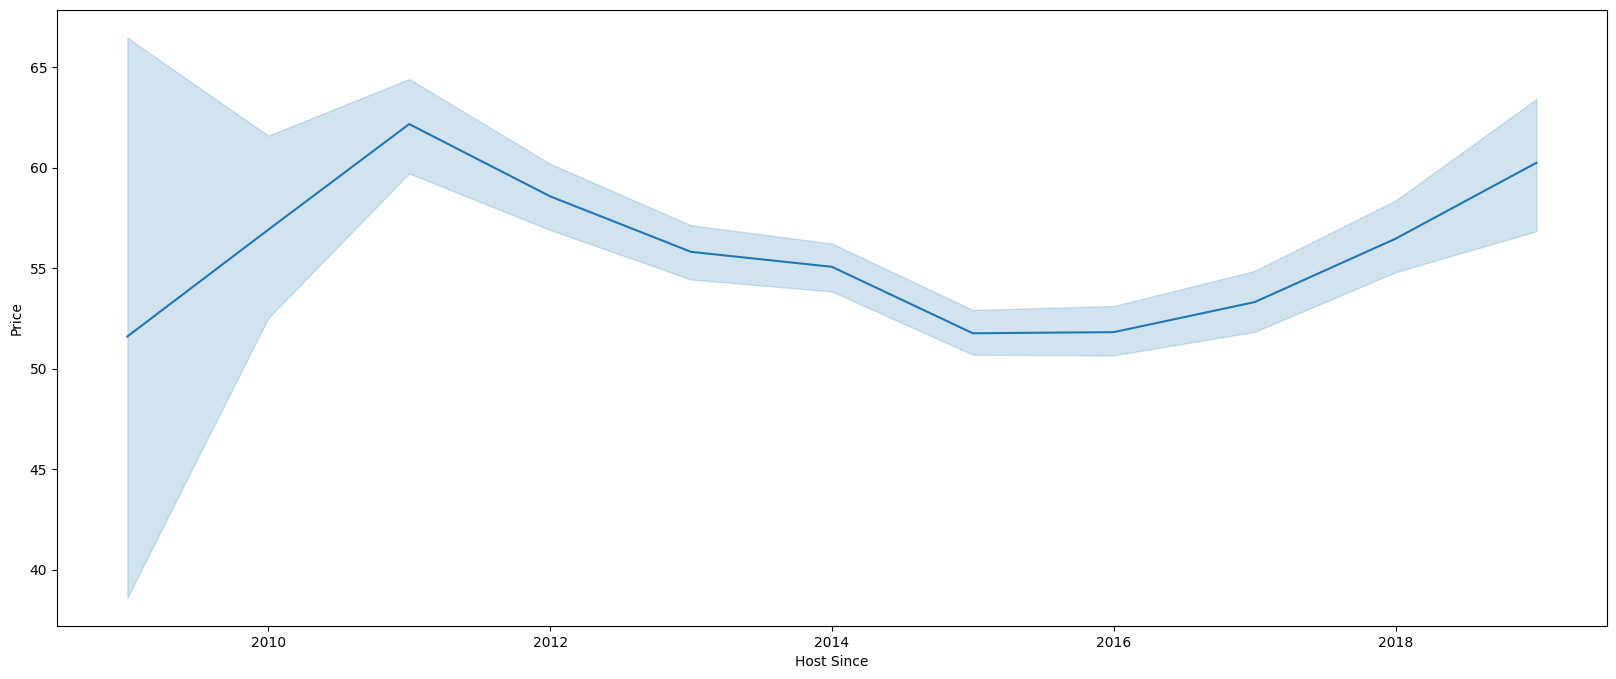

In [20]:
plt.figure(figsize=(20, 8))
sns.lineplot(x=year, y="Price", data=X_y_train)
plt.show()

## Is Superhost

In [21]:
print_NA_info(X_y_train, "Is Superhost")

Number of unique values: 3
Unique values: ['f' 't' nan]
Shape train data: (11243, 39)
The percentage of NA is: 0.13%

Is Superhost
f    9530
t    1698
Name: Is Superhost, dtype: int64


## neighbourhood

In [22]:
print_NA_info(X_y_train, "neighbourhood")

Number of unique values: 63
Unique values: ['Britz' 'Rummelsburg' 'Kreuzberg' 'Moabit' 'NeukÃ¶lln' 'Rudow'
 'Friedrichshain' 'Mitte' 'Wedding' 'Wilmersdorf' 'Tempelhof'
 'Prenzlauer Berg' 'Reinickendorf' 'Friedrichsfelde' 'Friedenau' 'Westend'
 'SchÃ¶neberg' 'Tiergarten' 'Charlottenburg' 'WeiÃ\x9fensee'
 'Schmargendorf' 'Adlershof' 'Baumschulenweg' 'Alt-HohenschÃ¶nhausen'
 'Lichtenberg' 'Grunewald' 'Zehlendorf' 'Karlshorst' 'Lichterfelde'
 'OberschÃ¶neweide' 'Marzahn' 'Alt-Treptow' 'Hansaviertel'
 'Potsdamer Platz' 'Lichtenrade' 'Lankwitz' 'Karow' 'Rahnsdorf' 'Pankow'
 '*' 'Steglitz' 'KÃ¶penick' 'Fennpfuhl' 'Nikolassee' 'Tegel'
 'NiederschÃ¶nhausen' 'Johannisthal' 'Altglienicke' 'Mahlsdorf' 'Spandau'
 'Mariendorf' 'Halensee' 'Friedrichshagen' 'PlÃ¤nterwald' 'Wilhelmstadt'
 'SchmÃ¶ckwitz' 'NiederschÃ¶neweide' 'Dahlem' 'Wannsee'
 'FranzÃ¶sisch Buchholz' 'Wittenau' 'Biesdorf' 'Buckow']
Shape train data: (11243, 39)
The percentage of NA is: 0.0%

neighbourhood
*                        136


# Neighborhood Group

In [23]:
print_NA_info(X_y_train, "Neighborhood Group")

Number of unique values: 12
Unique values: ['NeukÃ¶lln' 'Lichtenberg' 'Friedrichshain-Kreuzberg' 'Mitte'
 'Charlottenburg-Wilm.' 'Tempelhof - SchÃ¶neberg' 'Pankow' 'Reinickendorf'
 'Treptow - KÃ¶penick' 'Steglitz - Zehlendorf' 'Marzahn - Hellersdorf'
 'Spandau']
Shape train data: (11243, 39)
The percentage of NA is: 0.0%

Neighborhood Group
Charlottenburg-Wilm.         759
Friedrichshain-Kreuzberg    2744
Lichtenberg                  376
Marzahn - Hellersdorf         85
Mitte                       2187
NeukÃ¶lln                   1792
Pankow                      1823
Reinickendorf                150
Spandau                       48
Steglitz - Zehlendorf        228
Tempelhof - SchÃ¶neberg      757
Treptow - KÃ¶penick          294
Name: Neighborhood Group, dtype: int64


## Property Type

In [24]:
print_NA_info(X_y_train, "Property Type")

Number of unique values: 16
Unique values: ['Apartment' 'House' 'Serviced apartment' 'Other' 'Condominium' '*'
 'Townhouse' 'Bed and breakfast' 'Loft' 'Guest suite' 'Hostel'
 'Guesthouse' 'Boutique hotel' 'Boat' 'Bungalow' 'Hotel']
Shape train data: (11243, 39)
The percentage of NA is: 0.0%

Property Type
*                        48
Apartment             10215
Bed and breakfast        33
Boat                      3
Boutique hotel           16
Bungalow                  9
Condominium             268
Guest suite              35
Guesthouse               26
Hostel                   33
Hotel                     8
House                   191
Loft                    204
Other                    29
Serviced apartment       77
Townhouse                48
Name: Property Type, dtype: int64


## Room Type

In [25]:
print_NA_info(X_y_train, "Room Type")

Number of unique values: 3
Unique values: ['Private room' 'Entire home/apt' 'Shared room']
Shape train data: (11243, 39)
The percentage of NA is: 0.0%

Room Type
Entire home/apt    5587
Private room       5574
Shared room          82
Name: Room Type, dtype: int64


## Accomodates

In [26]:
print_NA_info(X_y_train, "Accomodates")

Number of unique values: 12
Unique values: ['1' '4' '2' '5' '3' '6' '10' '8' '9' '7' '12' '*']
Shape train data: (11243, 39)
The percentage of NA is: 0.0%

Accomodates
*        6
1     1132
10      11
12       3
2     6352
3     1455
4     1619
5      298
6      266
7       38
8       46
9       17
Name: Accomodates, dtype: int64


In [27]:
X_y_train.loc[X_y_train.Accomodates == "*", "Accomodates"] = np.nan

In [28]:
print_NA_info(X_y_train, "Accomodates")

Number of unique values: 12
Unique values: ['1' '4' '2' '5' '3' '6' '10' '8' '9' '7' '12' nan]
Shape train data: (11243, 39)
The percentage of NA is: 0.05%

Accomodates
1     1132
10      11
12       3
2     6352
3     1455
4     1619
5      298
6      266
7       38
8       46
9       17
Name: Accomodates, dtype: int64


In [29]:
X_y_train["Accomodates_float"] = X_y_train.Accomodates.astype("float")

In [30]:
print_NA_info(X_y_train, "Accomodates_float")

Number of unique values: 12
Unique values: [ 1.  4.  2.  5.  3.  6. 10.  8.  9.  7. 12. nan]
Shape train data: (11243, 40)
The percentage of NA is: 0.05%

Accomodates_float
1.0     1132
2.0     6352
3.0     1455
4.0     1619
5.0      298
6.0      266
7.0       38
8.0       46
9.0       17
10.0      11
12.0       3
Name: Accomodates_float, dtype: int64


## Bathrooms

In [31]:
print_NA_info(X_y_train, "Bathrooms")

Number of unique values: 9
Unique values: ['1.0' '2.0' '1.5' '2.5' '3.0' '0.0' '0.5' '*' nan]
Shape train data: (11243, 40)
The percentage of NA is: 0.1%

Bathrooms
*          5
0.0        6
0.5       50
1.0    10109
1.5      517
2.0      518
2.5       19
3.0        8
Name: Bathrooms, dtype: int64


In [32]:
X_y_train.loc[X_y_train.Bathrooms == "*", "Bathrooms"] = np.nan
X_y_train["Bathrooms_float"] = X_y_train.Bathrooms.astype("float")

In [33]:
print_NA_info(X_y_train, "Bathrooms_float")

Number of unique values: 8
Unique values: [1.  2.  1.5 2.5 3.  0.  0.5 nan]
Shape train data: (11243, 41)
The percentage of NA is: 0.14%

Bathrooms_float
0.0        6
0.5       50
1.0    10109
1.5      517
2.0      518
2.5       19
3.0        8
Name: Bathrooms_float, dtype: int64


## Bedrooms

In [34]:
print_NA_info(X_y_train, "Bedrooms")

Number of unique values: 8
Unique values: ['1.0' '2.0' '0.0' '4.0' '3.0' '5.0' nan '*']
Shape train data: (11243, 41)
The percentage of NA is: 0.04%

Bedrooms
*         2
0.0     875
1.0    8641
2.0    1434
3.0     250
4.0      32
5.0       5
Name: Bedrooms, dtype: int64


## Beds

In [35]:
print_NA_info(X_y_train, "Beds")

Number of unique values: 13
Unique values: ['1.0' '2.0' '3.0' '7.0' '4.0' '6.0' '5.0' '*' '0.0' '8.0' '10.0' nan
 '9.0']
Shape train data: (11243, 41)
The percentage of NA is: 0.04%

Beds
*          3
0.0       13
1.0     7306
10.0       4
2.0     2743
3.0      630
4.0      329
5.0      108
6.0       72
7.0       18
8.0        9
9.0        4
Name: Beds, dtype: int64


## Min Nights

In [36]:
print_NA_info(X_y_train, "Min Nights")

Number of unique values: 25
Unique values: ['*' '3' '2' '6' '1' '60' '7' '5' '4' '28' '90' '14' '15' '25' '21' '30'
 '61' '20' '9' '62' '8' '10' '13' '12' '180']
Shape train data: (11243, 41)
The percentage of NA is: 0.0%

Min Nights
*       185
1      2622
10      116
12       22
13       22
14      192
15       24
180      28
2      2938
20       57
21       39
25       22
28       32
3      2204
30      109
4       869
5       719
6       236
60      147
61       14
62       17
7       466
8        37
9        31
90       95
Name: Min Nights, dtype: int64


## Instant Bookable

In [37]:
print_NA_info(X_y_train, "Instant Bookable")

Number of unique values: 2
Unique values: ['f' 't']
Shape train data: (11243, 41)
The percentage of NA is: 0.0%

Instant Bookable
f    7570
t    3673
Name: Instant Bookable, dtype: int64


## Business Travel Ready

In [38]:
print_NA_info(X_y_train, "Business Travel Ready")

Number of unique values: 1
Unique values: ['f']
Shape train data: (11243, 41)
The percentage of NA is: 0.0%

Business Travel Ready
f    11243
Name: Business Travel Ready, dtype: int64
